# COURSERA CAPSTONE-The Battle of Neighborhoods

For the capstone project, I have chosen to explore the locality of Canada.In Notebook we will check which canadian city has has a better neighborhood to open a restaurant.

## INTRODUCTION / BUSINESS PROBLEM?

An Investor has arrived at our firm and ask us to find the best location in Canada to open up a restaurant. Our firm has decided to use population centres and nearby restaurants number as a major factor to conclude our result.
In this project we will try to find an optimal location for a restaurant. Specifically, this report will be targeted to stakeholders interested in opening an restaurant in Canada.

Since there are lots of restaurants in Canada we will try to detect locations which has a huge population compare to other parts. We would also prefer locations close to other restaurant.

We will use our data science powers to generate a few most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## DATA

For these project we need the Following data:-

    1.)https://en.wikipedia.org/wiki/List_of_the_100_largest_population_centres_in_Canada  
        It will provide List of the 100 largest population centres in canada
        
    2.)FourSquare API to find the number of near by restaurant in each areas
    
    3.)https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
        It will provide postal code for the location
    
    4.)https://cocl.us/Geospatial_data

##  Methodology  Section

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

from bs4 import BeautifulSoup# SOAP Library to Extract Data from URL
import requests 

import matplotlib as mpl #Data visualization
import matplotlib.pyplot as plt

In [5]:
url=requests.get('https://en.wikipedia.org/wiki/List_of_the_100_largest_population_centres_in_Canada').text
soup = BeautifulSoup(url, 'lxml')  # here we get our html code for the given url

In [46]:
table = soup.find('table')
#print(table.prettify())# gives table related code

td =table.find_all('td')

#print(td)# we can create three list to store postcode borough and neighbourhood

P_Centre=[]
Population=[]

for i in range(0,len(td),5):
    P_Centre.append(td[i+1].text.strip())
    Population.append(td[i+2].text.strip())# Only required Population center and Population number
    

df=pd.DataFrame(P_Centre)
df.columns=['Population Centre']
df.insert(loc=1,column='Population',value=Population)

df.head()


Population Centre Population
0             Toronto, Ontario  5,429,524
1             Montreal, Quebec  3,519,595
2  Vancouver, British Columbia  2,264,823
3             Calgary, Alberta  1,237,656
4            Edmonton, Alberta  1,062,643

In [47]:
df['Population'] = df.Population.str.split(',').str.join('').astype(int)
df


Population Centre  Population
0                        Toronto, Ontario     5429524
1                        Montreal, Quebec     3519595
2             Vancouver, British Columbia     2264823
3                        Calgary, Alberta     1237656
4                       Edmonton, Alberta     1062643
5         Ottawa–Gatineau, Ontario/Quebec      989657
6                      Winnipeg, Manitoba      711925
7                     Quebec City, Quebec      705103
8                       Hamilton, Ontario      693645
9   Kitchener–Waterloo–Cambridge, Ontario      470015
10                        London, Ontario      383437
11             Victoria, British Columbia      335696
12                   Halifax, Nova Scotia      316701
13                        Oshawa, Ontario      308875
14                       Windsor, Ontario      287069
15                Saskatoon, Saskatchewan      245181
16        St. Catharines–Niagara, Ontario      229246
17                   Regina, Saskatchewan      214631
18  St. John's, Newfoundland and Labrador      178427
19              Kelowna, British Columbia      151957
20                        Barrie, Ontario      145614
21                     Sherbrooke, Quebec      139565
22                        Guelph, Ontario      132397
23           Abbotsford, British Columbia      121279
24                      Kingston, Ontario      117660
25                        Kanata, Ontario      117304
26                 Trois-Rivières, Quebec      114203
27          Moncton–Dieppe, New Brunswick      108620
28           Chicoutimi–Jonquière, Quebec      104222
29                        Milton, Ontario      101715
..                                    ...         ...
70         Bowmanville–Newcastle, Ontario       39371
71       Salaberry-de-Valleyfield, Quebec       39048
72                     Shawinigan, Quebec       38211
73                       Rimouski, Quebec       36942
74                  Spruce Grove, Alberta       36135
75                    Sorel-Tracy, Quebec       36088
76       Campbell River, British Columbia       35138
77            Prince Albert, Saskatchewan       35102
78            Penticton, British Columbia       33617
79              Mission, British Columbia       33261
80                    Leamington, Ontario       32991
81                Moose Jaw, Saskatchewan       32724
82                   Stouffville, Ontario       32634
83     Lloydminster, Alberta/Saskatchewan       31400
84                       Orillia, Ontario       31128
85                     Stratford, Ontario       31053
86                   Orangeville, Ontario       30734
87        Cape Breton–Sydney, Nova Scotia       29904
88                      Bradford, Ontario       29862
89                         Leduc, Alberta       29556
90                       Timmins, Ontario       29331
91                       Okotoks, Alberta       28833
92                  Saint-Georges, Quebec       26921
93        Keswick–Elmhurst Beach, Ontario       26757
94                        Bolton, Ontario       26378
95                       Val-d'Or, Quebec       25541
96                      Cochrane, Alberta       25289
97     Quispamsis–Rothesay, New Brunswick       24445
98                       Midland, Ontario       24353
99                      Innisfil, Ontario       23992

[100 rows x 2 columns]

In [51]:
df1 =df.sort_values('Population',ascending=False).head(10)
df1

Population Centre  Population
0                       Toronto, Ontario     5429524
1                       Montreal, Quebec     3519595
2            Vancouver, British Columbia     2264823
3                       Calgary, Alberta     1237656
4                      Edmonton, Alberta     1062643
5        Ottawa–Gatineau, Ontario/Quebec      989657
6                     Winnipeg, Manitoba      711925
7                    Quebec City, Quebec      705103
8                      Hamilton, Ontario      693645
9  Kitchener–Waterloo–Cambridge, Ontario      470015

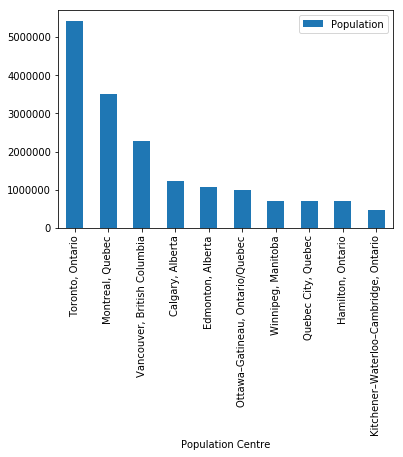

In [61]:
ax = df1.plot.bar(x=df1['Population Centre'])


So from our data, we come to know that the 10 most populated areas in Canada are Toronto, Montreal, Vancouver, Calgary, Edmonton, Ottawa, Winnipeg, Quebec City, Hamilton, Kitchener-Waterloo-Cambridge. Toronto population is much higher compare to other location. So we will focus on toronto to get our prefer location.

In [2]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

   

In [3]:
url1=requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup1 = BeautifulSoup(url1, 'lxml')  # here we get our html code for the given url

In [4]:
table1 = soup1.find('table')
#print(table.prettify())# gives table related code

td1 =table1.find_all('td')

#print(td)# we can create three list to store postcode borough and neighbourhood

Postcode=[]
Borough=[]
Neighbourhood=[]

for i in range(0,len(td1),3):
    Postcode.append(td1[i].text.strip())
    Borough.append(td1[i+1].text.strip())
    Neighbourhood.append(td1[i+2].text.strip())
    
#print (Postcode)
#print (Borough)
#print (Neighbourhood)

df2=pd.DataFrame(Postcode)
df2.columns=['Postcode']
df2.insert(loc=1,column='Borough',value=Borough )
df2.insert(loc=2,column='Neighbourhood',value=Neighbourhood )

df2.head()

Postcode           Borough     Neighbourhood
0      M1A      Not assigned      Not assigned
1      M2A      Not assigned      Not assigned
2      M3A        North York         Parkwoods
3      M4A        North York  Victoria Village
4      M5A  Downtown Toronto      Harbourfront

In [5]:
df2['Borough'].replace('Not assigned',np.nan, inplace=True)
df2.dropna(subset=['Borough'],inplace=True)
df2.head()

Postcode           Borough     Neighbourhood
2      M3A        North York         Parkwoods
3      M4A        North York  Victoria Village
4      M5A  Downtown Toronto      Harbourfront
5      M5A  Downtown Toronto       Regent Park
6      M6A        North York  Lawrence Heights

In [6]:
df2 = df2.groupby(['Postcode','Borough'])['Neighbourhood'].apply(', '.join).reset_index()
df2.columns= ['Postcode','Borough','Neighbourhood']
df2.head()

Postcode      Borough                           Neighbourhood
0      M1B  Scarborough                          Rouge, Malvern
1      M1C  Scarborough  Highland Creek, Rouge Hill, Port Union
2      M1E  Scarborough       Guildwood, Morningside, West Hill
3      M1G  Scarborough                                  Woburn
4      M1H  Scarborough                               Cedarbrae

In [7]:
#pd.set_option('display.max_colwidth', -1)
df2['Neighbourhood'].replace('Not assigned',"Queen's Park",inplace=True)

df2.shape

(103, 3)

In [8]:
df_geo = pd.read_csv('https://cocl.us/Geospatial_data')
df_geo.columns=['Postcode','Latitude','Longitude']
df_geo.head()
toronto_df = pd.merge(df2,df_geo, on='Postcode',how='inner')

toronto_df

Postcode           Borough  \
0        M1B       Scarborough   
1        M1C       Scarborough   
2        M1E       Scarborough   
3        M1G       Scarborough   
4        M1H       Scarborough   
5        M1J       Scarborough   
6        M1K       Scarborough   
7        M1L       Scarborough   
8        M1M       Scarborough   
9        M1N       Scarborough   
10       M1P       Scarborough   
11       M1R       Scarborough   
12       M1S       Scarborough   
13       M1T       Scarborough   
14       M1V       Scarborough   
15       M1W       Scarborough   
16       M1X       Scarborough   
17       M2H        North York   
18       M2J        North York   
19       M2K        North York   
20       M2L        North York   
21       M2M        North York   
22       M2N        North York   
23       M2P        North York   
24       M2R        North York   
25       M3A        North York   
26       M3B        North York   
27       M3C        North York   
28       M3H        North York   
29       M3J        North York   
..       ...               ...   
73       M6C              York   
74       M6E              York   
75       M6G  Downtown Toronto   
76       M6H      West Toronto   
77       M6J      West Toronto   
78       M6K      West Toronto   
79       M6L        North York   
80       M6M              York   
81       M6N              York   
82       M6P      West Toronto   
83       M6R      West Toronto   
84       M6S      West Toronto   
85       M7A      Queen's Park   
86       M7R       Mississauga   
87       M7Y      East Toronto   
88       M8V         Etobicoke   
89       M8W         Etobicoke   
90       M8X         Etobicoke   
91       M8Y         Etobicoke   
92       M8Z         Etobicoke   
93       M9A         Etobicoke   
94       M9B         Etobicoke   
95       M9C         Etobicoke   
96       M9L        North York   
97       M9M        North York   
98       M9N              York   
99       M9P         Etobicoke   
100      M9R         Etobicoke   
101      M9V         Etobicoke   
102      M9W         Etobicoke   

                                         Neighbourhood   Latitude  Longitude  
0                                       Rouge, Malvern  43.806686 -79.194353  
1               Highland Creek, Rouge Hill, Port Union  43.784535 -79.160497  
2                    Guildwood, Morningside, West Hill  43.763573 -79.188711  
3                                               Woburn  43.770992 -79.216917  
4                                            Cedarbrae  43.773136 -79.239476  
5                                  Scarborough Village  43.744734 -79.239476  
6          East Birchmount Park, Ionview, Kennedy Park  43.727929 -79.262029  
7                      Clairlea, Golden Mile, Oakridge  43.711112 -79.284577  
8      Cliffcrest, Cliffside, Scarborough Village West  43.716316 -79.239476  
9                          Birch Cliff, Cliffside West  43.692657 -79.264848  
10   Dorset Park, Scarborough Town Centre, Wexford ...  43.757410 -79.273304  
11                                   Maryvale, Wexford  43.750072 -79.295849  
12                                           Agincourt  43.794200 -79.262029  
13             Clarks Corners, Sullivan, Tam O'Shanter  43.781638 -79.304302  
14   Agincourt North, L'Amoreaux East, Milliken, St...  43.815252 -79.284577  
15                                     L'Amoreaux West  43.799525 -79.318389  
16                                         Upper Rouge  43.836125 -79.205636  
17                                   Hillcrest Village  43.803762 -79.363452  
18                        Fairview, Henry Farm, Oriole  43.778517 -79.346556  
19                                     Bayview Village  43.786947 -79.385975  
20                            Silver Hills, York Mills  43.757490 -79.374714  
21                             Newtonbrook, Willowdale  43.789053 -79.408493  
22                                    Willowdale South  43.770120 -79.408493  

In [9]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(toronto_df['Borough'].unique()),
        toronto_df.shape[0]
    )
)

The dataframe has 11 boroughs and 103 neighborhoods.


In [10]:
print(toronto_df['Borough'].unique())

['Scarborough' 'North York' 'East York' 'East Toronto' 'Central Toronto'
 'Downtown Toronto' 'York' 'West Toronto' "Queen's Park" 'Mississauga'
 'Etobicoke']


In [11]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, Canada are 43.653963, -79.387207.


In [12]:
# create map of Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Borough'], toronto_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In [135]:
CLIENT_ID = 'your id' # your Foursquare ID i have removed my credential before sharing notebook
CLIENT_SECRET = 'your id' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: your id
CLIENT_SECRET:your id


In [26]:
search_query = 'restaurant'
radius = 500
LIMIT=100
print(search_query + ' .... OK!')

Indian restaurant .... OK!


In [36]:
toronto_df.loc[0, 'Neighbourhood']

'Rouge, Malvern'

In [38]:
neighborhood_latitude = toronto_df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_df.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Rouge, Malvern are 43.806686299999996, -79.19435340000001.


In [39]:
Fsurl = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
Fsurl

'https://api.foursquare.com/v2/venues/search?client_id=CSQ3ONWHSJZXC0JKOE4Y2TIMAMHZBIJ0JUFVRUUOCCUHKMLW&client_secret=IK3RAW5ULCR1PSTJZWJEU1MNZBTCK5GJKJJ2OPV3ICWWHKTA&ll=43.653963,-79.387207&v=20180605&query=Indian restaurant&radius=500&limit=100'

In [40]:
results = requests.get(Fsurl).json()
results

{'meta': {'code': 200, 'requestId': '5d131c5b6c0aa5002f2ca886'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d14e941735',
      'name': 'American Restaurant',
      'pluralName': 'American Restaurants',
      'primary': True,
      'shortName': 'American'}],
    'hasPerk': False,
    'id': '4ad4c05ff964a52048f720e3',
    'location': {'address': '110 Chestnut Street',
     'cc': 'CA',
     'city': 'Toronto',
     'country': 'Canada',
     'distance': 145,
     'formattedAddress': ['110 Chestnut Street',
      'Toronto ON M5G 1R3',
      'Canada'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65488413420439,
       'lng': -79.38593077371578}],
     'lat': 43.65488413420439,
     'lng': -79.38593077371578,
     'postalCode': 'M5G 1R3',
     'state': 'ON'},
    'name': 'Hemispheres Restaurant & Bistro',
    'referralId': 'v-1561533531'},
   {'catego

In [41]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [50]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

categories  hasPerk  \
0  [{'id': '4bf58dd8d48988d14e941735', 'name': 'A...    False   
1  [{'id': '4bf58dd8d48988d10f941735', 'name': 'I...    False   
2  [{'id': '4bf58dd8d48988d145941735', 'name': 'C...    False   
3  [{'id': '4bf58dd8d48988d10f941735', 'name': 'I...    False   
4  [{'id': '4bf58dd8d48988d115941735', 'name': 'M...    False   

                         id     location.address location.cc location.city  \
0  4ad4c05ff964a52048f720e3  110 Chestnut Street          CA       Toronto   
1  4afd920ff964a520ad2822e3      181 Dundas St W          CA       Toronto   
2  4b2027b5f964a520f82d24e3      195 Dundas St W          CA       Toronto   
3  4b2a634af964a52020a824e3      123 Dundas St W          CA       Toronto   
4  4ddd83c788779c82beb061fc     199 Dundas St. W          CA       Toronto   

  location.country location.crossStreet  location.distance  \
0           Canada                  NaN                145   
1           Canada     W of Chestnut St                136   
2           Canada    at University Ave                107   
3           Canada  btw Elizabeth & Bay                311   
4           Canada       at Centre Ave.                106   

                           location.formattedAddress  \
0  [110 Chestnut Street, Toronto ON M5G 1R3, Canada]   
1  [181 Dundas St W (W of Chestnut St), Toronto O...   
2  [195 Dundas St W (at University Ave), Toronto ...   
3  [123 Dundas St W (btw Elizabeth & Bay), Toront...   
4  [199 Dundas St. W (at Centre Ave.), Toronto ON...   

                             location.labeledLatLngs  location.lat  \
0  [{'lat': 43.65488413420439, 'label': 'display'...     43.654884   
1  [{'lat': 43.65511996683289, 'label': 'display'...     43.655120   
2  [{'lat': 43.65492521335936, 'label': 'display'...     43.654925   
3  [{'lat': 43.65564910619165, 'label': 'display'...     43.655649   
4  [{'lat': 43.65491647880546, 'label': 'display'...     43.654916   

   location.lng location.postalCode location.state  \
0    -79.385931             M5G 1R3             ON   
1    -79.386645             M5G 1C7             ON   
2    -79.387089             M5G 1C7             ON   
3    -79.384119                 NaN             ON   
4    -79.387172             M5g 1c8             ON   

                              name    referralId venuePage.id  
0  Hemispheres Restaurant & Bistro  v-1561533531          NaN  
1            Indian Biriyani House  v-1561533531          NaN  
2    Hong Shing Chinese Restaurant  v-1561533531     60327598  
3                   Indian Flavour  v-1561533531          NaN  
4                       Ali Baba's  v-1561533531          NaN

In [51]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

name                  categories  \
0                 Hemispheres Restaurant & Bistro         American Restaurant   
1                           Indian Biriyani House           Indian Restaurant   
2                   Hong Shing Chinese Restaurant          Chinese Restaurant   
3                                  Indian Flavour           Indian Restaurant   
4                                      Ali Baba's   Middle Eastern Restaurant   
5                      Wah Too Seafood Restaurant          Chinese Restaurant   
6                                 Cali Restaurant       Vietnamese Restaurant   
7                           Mami's Indian Cuisine                  Food Truck   
8                         Osgoode Hall Restaurant     New American Restaurant   
9                               Anoush Restaurant                  Restaurant   
10                    Jodpore Club Indian Cuisine           Indian Restaurant   
11                                   Lai Wah Heen          Chinese Restaurant   
12                     Alio Restaurant & Wine Bar          Italian Restaurant   
13                              Tundra Restaurant                  Restaurant   
14                                           JOEY         American Restaurant   
15                                 Barristers Bar                  Restaurant   
16                         Maezo Restaurant & Bar           Indian Restaurant   
17                                           KAKA         Japanese Restaurant   
18  Spring Rolls | Japanese Restaurant in Toronto            Theme Restaurant   
19             Castries Bar & Five Way Restaurant        Caribbean Restaurant   
20                               Maezo Restaurant           Indian Restaurant   
21                               Zhu's Restaurant          Chinese Restaurant   
22                     Some Time Girll Restaurant         Szechuan Restaurant   
23                       spring garden Restaurant          Chinese Restaurant   
24                  Terrace Restaurant at Elmwood         American Restaurant   
25                    Toronto Big Bowl Restaurant         Szechuan Restaurant   
26                   Mt. Fuji Japanese Restaurant         Japanese Restaurant   
27                   Yueh Tung Chinese Restaurant          Chinese Restaurant   
28                Kyoto House Japanese Restaurant            Sushi Restaurant   
29                           Donatello Restaurant          Italian Restaurant   
30                        New Treasure Restaurant          Dim Sum Restaurant   
31                        The Elm Tree Restaurant  Modern European Restaurant   
32                    Wah Sing Seafood Restaurant          Chinese Restaurant   
33             East Restaurant Asian Street Flair            Asian Restaurant   
34                                         Subway              Sandwich Place   
35             Akashiro Japanese Restaurant & Bar            Sushi Restaurant   
36                               Adega Restaurant                  Restaurant   
37                    Hua Sang Seafood Restaurant          Chinese Restaurant   
38             Kowloon Seafood Dim Sum Restaurant          Chinese Restaurant   
39                              Bodega Restaurant           French Restaurant   
40                       Fune Japanese Restaurant         Japanese Restaurant   
41                        Little India Restaurant           Indian Restaurant   
42                                   Spring Rolls            Asian Restaurant   
43                             Valens Restaurants                  Restaurant   

                     address  cc     city country  \
0        110 Chestnut Street  CA  Toronto  Canada   
1            181 Dundas St W  CA  Toronto  Canada   
2            195 Dundas St W  CA  Toronto  Canada   
3            123 Dundas St W  CA  Toronto  Canada   
4           199 Dundas St. W  CA  Toronto  Canada   
5             56 Centre Ave.  CA  Toronto  Canada   
6          179 Dundas St. W.

In [52]:
dataframe_filtered.name

0                   Hemispheres Restaurant & Bistro
1                             Indian Biriyani House
2                     Hong Shing Chinese Restaurant
3                                    Indian Flavour
4                                        Ali Baba's
5                        Wah Too Seafood Restaurant
6                                   Cali Restaurant
7                             Mami's Indian Cuisine
8                           Osgoode Hall Restaurant
9                                 Anoush Restaurant
10                      Jodpore Club Indian Cuisine
11                                     Lai Wah Heen
12                       Alio Restaurant & Wine Bar
13                                Tundra Restaurant
14                                             JOEY
15                                   Barristers Bar
16                           Maezo Restaurant & Bar
17                                             KAKA
18    Spring Rolls | Japanese Restaurant in Toronto
19          

In [59]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # create the API request URL
        Fsurl = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
        Fsurl
            
        # make the GET request
        results = requests.get(Fsurl).json()
        
        # assign relevant part of JSON to venues
        venues = results['response']['venues']

        # tranform venues into a dataframe
        dataframe = json_normalize(venues)
        dataframe.head()
        
        filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
        dataframe_filtered = dataframe.loc[:, filtered_columns]
        
        
        # filter the category for each row
        dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

        # clean column names by keeping only last term
        dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]


        
        # return only relevant information for each nearby venue
        venues_list.append(dataframe_filtered)

 #   nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
 #   nearby_venues.columns = ['Neighborhood', 
 #                 'Neighborhood Latitude', 
 #                 'Neighborhood Longitude', 
 #                 'Venue', 
 #                 'Venue Latitude', 
 #                 'Venue Longitude', 
 #                 'Venue Category']
    
    return(venues_list)

In [78]:

toronto_venues = getNearbyVenues(names=toronto_df['Neighbourhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude']
                                  )



Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [79]:
df_final = pd.concat(toronto_venues)
df_final

name                  categories  \
0                 Hemispheres Restaurant & Bistro         American Restaurant   
1                           Indian Biriyani House           Indian Restaurant   
2                   Hong Shing Chinese Restaurant          Chinese Restaurant   
3                                  Indian Flavour           Indian Restaurant   
4                                 Cali Restaurant       Vietnamese Restaurant   
5                                      Ali Baba's   Middle Eastern Restaurant   
6                      Wah Too Seafood Restaurant          Chinese Restaurant   
7                           Mami's Indian Cuisine                  Food Truck   
8                         Osgoode Hall Restaurant     New American Restaurant   
9                                    Lai Wah Heen          Chinese Restaurant   
10                    Jodpore Club Indian Cuisine           Indian Restaurant   
11                              Anoush Restaurant                  Restaurant   
12                                 Barristers Bar                  Restaurant   
13                              Tundra Restaurant                  Restaurant   
14                                           KAKA         Japanese Restaurant   
15  Spring Rolls | Japanese Restaurant in Toronto            Theme Restaurant   
16             Castries Bar & Five Way Restaurant        Caribbean Restaurant   
17                               Maezo Restaurant           Indian Restaurant   
18                               Zhu's Restaurant          Chinese Restaurant   
19                       spring garden Restaurant          Chinese Restaurant   
20                  Terrace Restaurant at Elmwood         American Restaurant   
21                         Maezo Restaurant & Bar           Indian Restaurant   
22                    Toronto Big Bowl Restaurant         Szechuan Restaurant   
23                   Mt. Fuji Japanese Restaurant         Japanese Restaurant   
24                     Some Time Girll Restaurant         Szechuan Restaurant   
25                     Alio Restaurant & Wine Bar          Italian Restaurant   
26                   Yueh Tung Chinese Restaurant          Chinese Restaurant   
27                        The Elm Tree Restaurant  Modern European Restaurant   
28             East Restaurant Asian Street Flair            Asian Restaurant   
29                        New Treasure Restaurant          Dim Sum Restaurant   
..                                            ...                         ...   
14                                           KAKA         Japanese Restaurant   
15  Spring Rolls | Japanese Restaurant in Toronto            Theme Restaurant   
16             Castries Bar & Five Way Restaurant        Caribbean Restaurant   
17                               Maezo Restaurant           Indian Restaurant   
18                               Zhu's Restaurant          Chinese Restaurant   
19                       spring garden Restaurant          Chinese Restaurant   
20                  Terrace Restaurant at Elmwood         American Restaurant   
21                         Maezo Restaurant & Bar           Indian Restaurant   
22                    Toronto Big Bowl Restaurant         Szechuan Restaurant   
23                   Mt. Fuji Japanese Restaurant         Japanese Restaurant   
24                     Some Time Girll Restaurant         Szechuan Restaurant   
25                     Alio Restaurant & Wine Bar          Italian Restaurant   
26                   Yueh Tung Chinese Restaurant          Chinese Restaurant   
27                        The Elm Tree Restaurant  Modern European Restaurant   
28             East Restaurant Asian Street Flair            Asian Restaurant   
29                        New Treasure Restaurant          Dim Sum Restaurant   
30                                         Subway              Sandwich Place   
31                    Wah Sing Seafood Restaurant          Chinese Restauran

In [80]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4532 entries, 0 to 43
Data columns (total 15 columns):
name                4532 non-null object
categories          4532 non-null object
address             3914 non-null object
cc                  4532 non-null object
city                4120 non-null object
country             4532 non-null object
crossStreet         2678 non-null object
distance            4532 non-null int64
formattedAddress    4532 non-null object
labeledLatLngs      4532 non-null object
lat                 4532 non-null float64
lng                 4532 non-null float64
postalCode          3090 non-null object
state               4120 non-null object
id                  4532 non-null object
dtypes: float64(2), int64(1), object(12)
memory usage: 566.5+ KB


In [91]:
#df_final.drop(['cc', 'formattedAddress','labeledLatLngs','id'], axis=1,inplace=True)
df_final.dropna(subset=['lat','lng','postalCode',],inplace=True)

In [92]:
df_final.columns=['Name','Categories','Address','City','Country','CrossStreet','distance','lat','lng','Postcode','State']
df_final

Name                  Categories  \
0                 Hemispheres Restaurant & Bistro         American Restaurant   
1                           Indian Biriyani House           Indian Restaurant   
2                   Hong Shing Chinese Restaurant          Chinese Restaurant   
4                                 Cali Restaurant       Vietnamese Restaurant   
5                                      Ali Baba's   Middle Eastern Restaurant   
6                      Wah Too Seafood Restaurant          Chinese Restaurant   
7                           Mami's Indian Cuisine                  Food Truck   
8                         Osgoode Hall Restaurant     New American Restaurant   
9                                    Lai Wah Heen          Chinese Restaurant   
11                              Anoush Restaurant                  Restaurant   
12                                 Barristers Bar                  Restaurant   
13                              Tundra Restaurant                  Restaurant   
14                                           KAKA         Japanese Restaurant   
15  Spring Rolls | Japanese Restaurant in Toronto            Theme Restaurant   
17                               Maezo Restaurant           Indian Restaurant   
21                         Maezo Restaurant & Bar           Indian Restaurant   
22                    Toronto Big Bowl Restaurant         Szechuan Restaurant   
25                     Alio Restaurant & Wine Bar          Italian Restaurant   
27                        The Elm Tree Restaurant  Modern European Restaurant   
28             East Restaurant Asian Street Flair            Asian Restaurant   
30                                         Subway              Sandwich Place   
31                    Wah Sing Seafood Restaurant          Chinese Restaurant   
33             Kowloon Seafood Dim Sum Restaurant          Chinese Restaurant   
34                               Adega Restaurant                  Restaurant   
35                    Hua Sang Seafood Restaurant          Chinese Restaurant   
37                           Donatello Restaurant          Italian Restaurant   
38                              Bodega Restaurant           French Restaurant   
40                        Little India Restaurant           Indian Restaurant   
42                                           JOEY         American Restaurant   
43                                   Spring Rolls            Asian Restaurant   
..                                            ...                         ...   
0                 Hemispheres Restaurant & Bistro         American Restaurant   
1                           Indian Biriyani House           Indian Restaurant   
2                   Hong Shing Chinese Restaurant          Chinese Restaurant   
4                                 Cali Restaurant       Vietnamese Restaurant   
5                                      Ali Baba's   Middle Eastern Restaurant   
6                      Wah Too Seafood Restaurant          Chinese Restaurant   
7                           Mami's Indian Cuisine                  Food Truck   
8                         Osgoode Hall Restaurant     New American Restaurant   
9                                    Lai Wah Heen          Chinese Restaurant   
11                              Anoush Restaurant                  Restaurant   
12                                 Barristers Bar                  Restaurant   
13                              Tundra Restaurant                  Restaurant   
14                                           KAKA         Japanese Restaurant   
15  Spring Rolls | Japanese Restaurant in Toronto            Theme Restaurant   
17                               Maezo Restaurant           Indian Restaurant   
21                         Maezo Restaurant & Bar           Indian Restaurant   
22                    Toronto Big Bowl Restaurant         Szechuan Restaurant   
25                     Alio Restaurant & Wine Bar          Italian Restauran

In [93]:
# create map of Toronto using latitude and longitude values
map_T = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(df_final['lat'], df_final['lng'],df_final['Name']):
    #label = '{}'.format(Name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_T)  
    
map_T

In [104]:
x1=df_final.loc[:,['lat']]
x2=df_final.loc[:,['lng']]

In [128]:
from sklearn.cluster import KMeans

number_of_clusters = 5

#good_xys = df_good_locations[['X', 'Y']].values
kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(x1,x2)

kmeans.labels_[0:10] 

df_final.insert(0, 'Cluster Labels', kmeans.labels_)

In [131]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(number_of_clusters)
ys = [i + x + (i*x)**2 for i in range(number_of_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_final['lat'], df_final['lng'],df_final['Name'],df_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Result

We have noticed from our research that Toronto is most populate city. Further torronto has 11 borrow unfortunately we are not able to find any data going into such a depth of city. So therefore we have use foursqaure api to find number of restaurant in toronto city.

## Conclusion

From the map we come to know that cluster 3 is most suitable for opening a restaurant. Location near to latitude 43.654786 and longitude -79.386694 will be prefer location.